<a href="https://colab.research.google.com/github/mohdbilal14/Porter_Neural_Networks_Regression/blob/main/Porter_Neural_Networks_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Dictionary

Each row in this file corresponds to one unique delivery. Each column corresponds to a feature as explained below.

market_id : integer id for the market where the restaurant lies

created_at : the timestamp at which the order was placed

actual_delivery_time : the timestamp when the order was delivered

store_primary_category : category for the restaurant

order_protocol : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)

total_items subtotal : final price of the order

num_distinct_items : the number of distinct items in the order

min_item_price : price of the cheapest item in the order

max_item_price : price of the costliest item in order

total_onshift_partners : number of delivery partners on duty at the time order was placed

total_busy_partners : number of delivery partners attending to other tasks

total_outstanding_orders : total number of orders to be fulfilled at the moment

estimated_store_to_consumer_driving_duration : approximate travel time from restaurant to customer



In [ ]:
import pandas as pd
df=pd.read_csv('/content/data_2.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/data_2.csv'

**Defining problem statement, importing the data and data structure analysis**

Porter, India’s leading intra-city logistics company, aims to predict delivery time for food orders placed through its platform. Accurate delivery time predictions will help:

Improve customer satisfaction through better delivery time estimates.

Optimize fleet management by forecasting load and dispatch times.

Enhance operational efficiency using data-driven decision-making.

You are tasked with building a regression model using historical order data to estimate the delivery time based on features such as order details, delivery partner availability, and time of the day.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70319 entries, 0 to 70318
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   market_id                                     70319 non-null  float64
 1   created_at                                    70319 non-null  object 
 2   actual_delivery_time                          70318 non-null  object 
 3   store_primary_category                        70318 non-null  float64
 4   order_protocol                                70318 non-null  float64
 5   total_items                                   70318 non-null  float64
 6   subtotal                                      70318 non-null  float64
 7   num_distinct_items                            70318 non-null  float64
 8   min_item_price                                70318 non-null  float64
 9   max_item_price                                70318 non-null 

In [ ]:
df.isna().sum()

,0
market_id,0
created_at,0
actual_delivery_time,1
store_primary_category,1
order_protocol,1
total_items,1
subtotal,1
num_distinct_items,1
min_item_price,1
max_item_price,1


In [ ]:
print('NAN in total_onshift_dashers :',
      (len(df['total_onshift_dashers']) - df['total_onshift_dashers'].isna().sum()) / len(df['total_onshift_dashers']) * 100)
df.drop(['total_onshift_dashers'], inplace=True, axis=1)

print('NAN in total_busy_dashers :',
      (len(df['total_busy_dashers']) - df['total_busy_dashers'].isna().sum()) / len(df['total_busy_dashers']) * 100)
df.drop(['total_busy_dashers'], inplace=True, axis=1)

print('NAN in total_outstanding_orders :',
      (len(df['total_outstanding_orders']) - df['total_outstanding_orders'].isna().sum()) / len(df['total_outstanding_orders']) * 100)
df.drop(['total_outstanding_orders'], inplace=True, axis=1)

df.head()


NAN in total_onshift_dashers : 99.99857790924217
NAN in total_busy_dashers : 99.99857790924217
NAN in total_outstanding_orders : 99.99857790924217


,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4.0,1.0,4.0,3441.0,4.0,557.0,1239.0,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46.0,2.0,1.0,1900.0,1.0,1400.0,1400.0,690.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36.0,3.0,4.0,4771.0,3.0,820.0,1604.0,289.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38.0,1.0,1.0,1525.0,1.0,1525.0,1525.0,795.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38.0,1.0,2.0,3620.0,2.0,1425.0,2195.0,205.0




**Data preprocessing and feature engineering**  

*   Data cleaning
*   Null value handling

*   Creating the target column (time taken for delivery) from order timestamp and delivery timestamp

*   Getting hour and day of the week
*   Encoding categorical column



In [ ]:
# Fill missing 'store_primary_category' with a placeholder
df['store_primary_category'].fillna('Other', inplace=True)

# Fill missing 'market_id' with 0.0 (keep float type)
df['market_id'].fillna(0.0, inplace=True)

# Fill missing 'order_protocol' with 0.0 (keep float type)
df['order_protocol'].fillna(0.0, inplace=True)

# Drop rows where actual_delivery_time is missing
df.dropna(subset=['actual_delivery_time'], inplace=True)

# Show count of remaining null values
print(df.isna().sum())

# Show dataframe info
df.info()


market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
estimated_store_to_consumer_driving_duration    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 70318 entries, 0 to 70317
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   market_id                                     70318 non-null  float64
 1   created_at                                    70318 non-null  object 
 2   actual_delivery_time        

<ipython-input-8-761142453>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['store_primary_category'].fillna('Other', inplace=True)
<ipython-input-8-761142453>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Other' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['store_primary_category'].fillna('Other', inplace=True)
<ipython-input-8-761142453>:5: FutureWarning: A value is trying to be set on a 

In [ ]:
# Identify categorical columns (including datetime if any are still object dtype)
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns:', cat_col)

# Identify numerical columns
num_col = [col for col in df.columns if df[col].dtype in ['float64', 'int64']]
print('Numerical columns:', num_col)

# Display unique value counts for categorical columns
print('\nUnique value counts in categorical columns:')
print(df[cat_col].nunique())


Categorical columns: ['created_at', 'actual_delivery_time', 'store_primary_category']
Numerical columns: ['market_id', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'estimated_store_to_consumer_driving_duration']

Unique value counts in categorical columns:
created_at                68123
actual_delivery_time      67712
store_primary_category       71
dtype: int64


In [ ]:
# Convert to datetime format
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'], errors='coerce')
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

# Drop rows where datetime conversion failed (if any)
df.dropna(subset=['actual_delivery_time', 'created_at'], inplace=True)

# Create delivery time in minutes
df['Time_taken_for_delivery'] = (df['actual_delivery_time'] - df['created_at']) / pd.Timedelta(minutes=1)

# Extract hour of the day and day of the week
df['hour'] = df['created_at'].dt.hour
df['day'] = df['created_at'].dt.dayofweek


Dropping the Column that are no longer required

In [ ]:
df.drop(['created_at', 'actual_delivery_time'], axis=1, inplace=True)


In [ ]:
# No need to change its dtype if already numeric
df['store_primary_category'] = df['store_primary_category'].fillna(0)
df.head()

<ipython-input-12-2900685351>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['store_primary_category'] = df['store_primary_category'].fillna(0)


,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,estimated_store_to_consumer_driving_duration,Time_taken_for_delivery,hour,day
0,1.0,4.0,1.0,4.0,3441.0,4.0,557.0,1239.0,861.0,47.0,22,4
1,2.0,46.0,2.0,1.0,1900.0,1.0,1400.0,1400.0,690.0,44.0,21,1
2,2.0,36.0,3.0,4.0,4771.0,3.0,820.0,1604.0,289.0,55.0,0,0
3,1.0,38.0,1.0,1.0,1525.0,1.0,1525.0,1525.0,795.0,59.0,3,3
4,1.0,38.0,1.0,2.0,3620.0,2.0,1425.0,2195.0,205.0,46.0,2,1


Data visualization and cleaning

*   Visualization for various features

*   Check for outliers


*   Remove outliers
*   Compare plots and results


<Axes: >

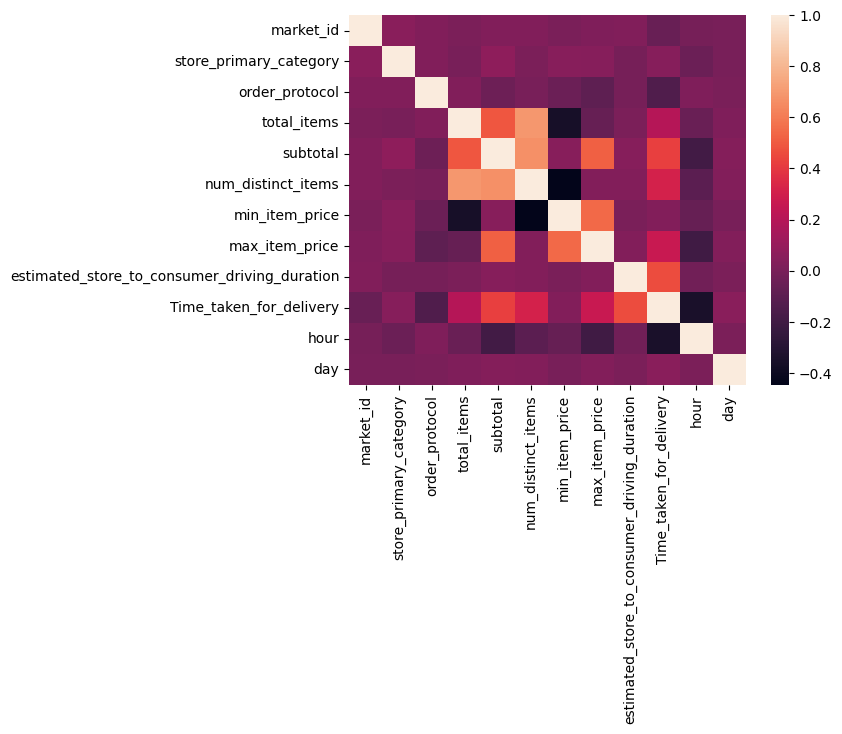

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr())

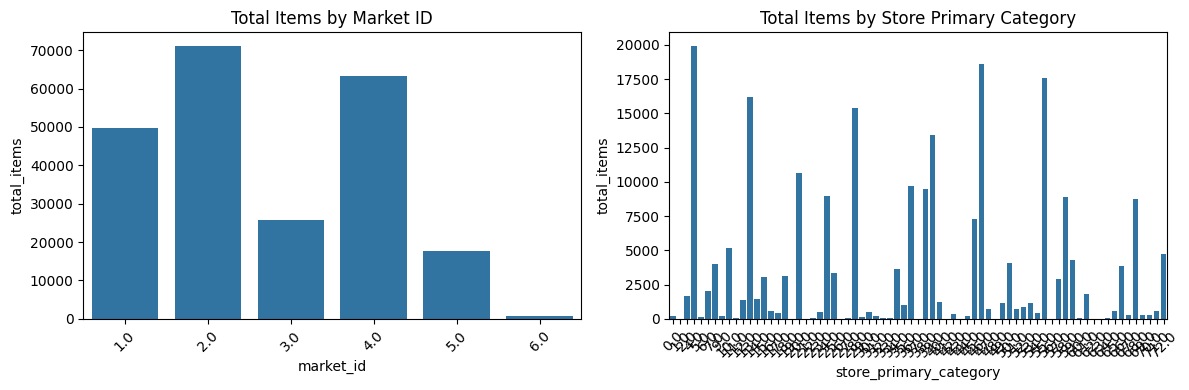

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# First barplot: total_items summed by market_id
plt.subplot(1, 2, 1)
sns.barplot(y='total_items', x='market_id', data=df, estimator='sum', errorbar=None)
plt.title('Total Items by Market ID')
plt.xticks(rotation=45)

# Second barplot: total_items summed by store_primary_category
plt.subplot(1, 2, 2)
sns.barplot(y='total_items', x='store_primary_category', data=df, estimator='sum', errorbar=None)
plt.title('Total Items by Store Primary Category')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


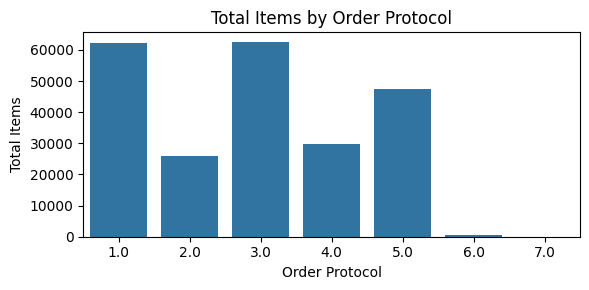

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
sns.barplot(y='total_items', x='order_protocol', data=df, estimator='sum', errorbar=None)
plt.title('Total Items by Order Protocol')
plt.xlabel('Order Protocol')
plt.ylabel('Total Items')
plt.tight_layout()
plt.show()


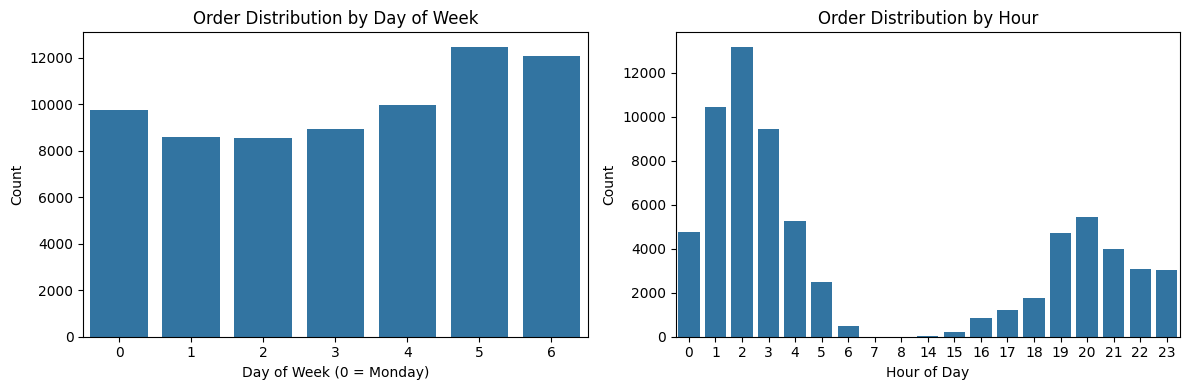

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Countplot for day of the week
plt.subplot(1, 2, 1)
sns.countplot(x='day', data=df)
plt.title('Order Distribution by Day of Week')
plt.xlabel('Day of Week (0 = Monday)')
plt.ylabel('Count')

# Countplot for hour of the day
plt.subplot(1, 2, 2)
sns.countplot(x='hour', data=df)
plt.title('Order Distribution by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


<Axes: xlabel='hour', ylabel='Time_taken_for_delivery'>

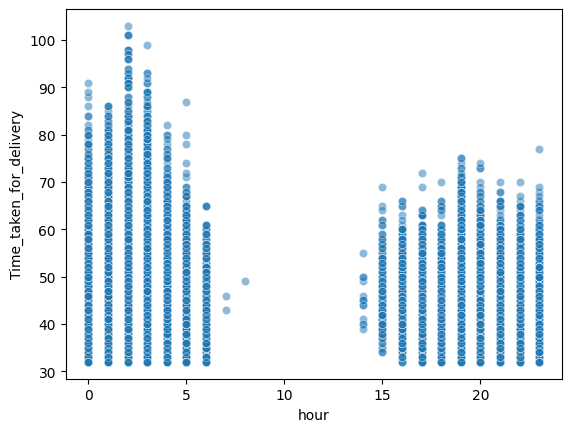

In [ ]:
sns.scatterplot(x='hour', y='Time_taken_for_delivery', data=df, alpha=0.5)

**No Collinearity**

Detecting Outliers

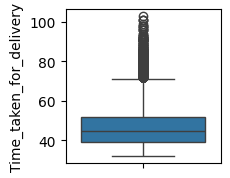

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
sns.boxplot(y='Time_taken_for_delivery',data=df)
plt.xticks(rotation=90);
plt.show()

Removing Outliers

In [ ]:
import numpy as np

# Calculate and print the percentage of rows with delivery time > 400 minutes
percent_high_time = (df[df['Time_taken_for_delivery'] > 400].shape[0] / df.shape[0]) * 100
print(f"Percentage of deliveries taking more than 400 minutes: {percent_high_time:.2f}%")

# Drop all such rows (not just the first one)
df = df[df['Time_taken_for_delivery'] <= 400]


Percentage of deliveries taking more than 400 minutes: 0.00%


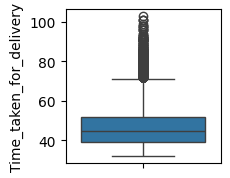

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
sns.boxplot(y='Time_taken_for_delivery',data=df)
plt.xticks(rotation=90);
plt.show()

Model training with random forest




*   Data splitting
*   Random forest regression



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
y=df['Time_taken_for_delivery']
x=df.drop(['Time_taken_for_delivery'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
prediction=regressor.predict(X_test)
mse=mean_squared_error(y_test,prediction)
rmse=mse**.5
print("mse : ",mse)
print("rmse : ",rmse)
mae=mean_absolute_error(y_test,prediction)
print("mase : ",mae)
mape=np.mean(np.abs((y_test - prediction)/y_test))*100
print("mape : ",mape)

r2_score(y_test,prediction)

mse :  32.58520598506987
rmse :  5.708345293083616
mase :  4.195868448317894
mape :  9.082464726383918


0.6353374700936396

**Regression with neural networks (30 points)**


*   Data scaling

*   Defining NN architecture

*   Trying different combinations and hyperparameters
*   Model training


*   Comparing results with random forest


In [ ]:
#Scalling the data to feed before neural network

from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
x_scaled=scaler.fit_transform(x)
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

We will build a simple neural network to train our regression model it is a sequential model with two layers,

we have kept the number of nodes in the first layers equal to the number of input columns, and for the subsequent layers 32, 32, which can we changed or experimented with

the activation for the layers is kept as relu because it is a great non linear activation function that works for most cases, we could have used leaky relu if we see gradient vanishing.

the last layer has one node because it will give the single result that is our delivery time and the activation function for that should be linear

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(11,kernel_initializer='normal',activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mse',optimizer='Adam',metrics=['mse','mae'])
history=model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_split=0.2)

Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 2169.5752 - mae: 45.6125 - mse: 2169.5752 - val_loss: 1322.2614 - val_mae: 35.1037 - val_mse: 1322.2614
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 697.5446 - mae: 22.7229 - mse: 697.5446 - val_loss: 124.1973 - val_mae: 8.6154 - val_mse: 124.1973
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 114.4778 - mae: 8.3283 - mse: 114.4778 - val_loss: 96.2799 - val_mae: 7.5900 - val_mse: 96.2799
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 86.6305 - mae: 7.2066 - mse: 86.6305 - val_loss: 72.2917 - val_mae: 6.5637 - val_mse: 72.2917
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 65.1931 - mae: 6.2546 - mse: 65.1931 - val_loss: 57.7528 - val_mae: 5.8333 - val_mse: 57.7528
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 53.9786 - mae: 5.6473 - mse: 53.9786 - val_loss: 51.1860 - val_mae: 5.4061 - val_mse: 51.1860
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 48.0340 - mae

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,817 (18.82 KB)

 Trainable params: 1,605 (6.27 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,212 (12.55 KB)

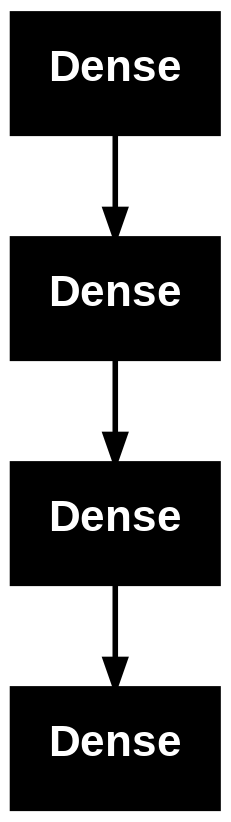

In [ ]:
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model)

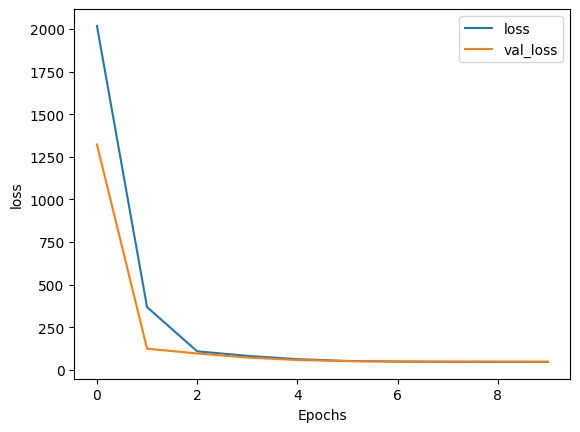

In [ ]:
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel("Epochs")
    plt.ylabel('loss')
    plt.legend(['loss','val_loss'])
    plt.show()

In [ ]:
print('r2_score:',r2_score(y_test, model.predict(X_test)))
mse = mean_squared_error(y_test, model.predict(X_test))
rmse = mse**.5
print("mse : ",mse)
print("rmse : ",rmse)
print("errors for neural net")
mae = mean_absolute_error(y_test, model.predict(X_test))
print("mae : ",mae)

440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
r2_score: 0.46395760421174037
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
mse :  47.89922312000648
rmse :  6.920926463993566
errors for neural net
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step
mae :  5.18457769872928


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, model.predict(X_test))

440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


0.11097500638927625